In [0]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
%matplotlib inline   
estrelas = pd.read_csv('Estrelas.csv') 

In [0]:
estrelas.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [0]:
estrelas = estrelas.rename(columns={'Temperature (K)': 'Temperature(K)', 'Absolute magnitude(Mv)': 'Absolute_magnitude(Mv)', 'Star type': 'Star_Type', 'Star color': 'Star_color', 'Spectral Class': 'Spectral_Class'})

**VERIFICANDO CLASSIFICADORES**

In [0]:
estrelas.Star_color.unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [0]:
estrelas.Spectral_Class.unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [0]:
estrelas.Star_Type.unique()

array([0, 1, 2, 3, 4, 5])

** **

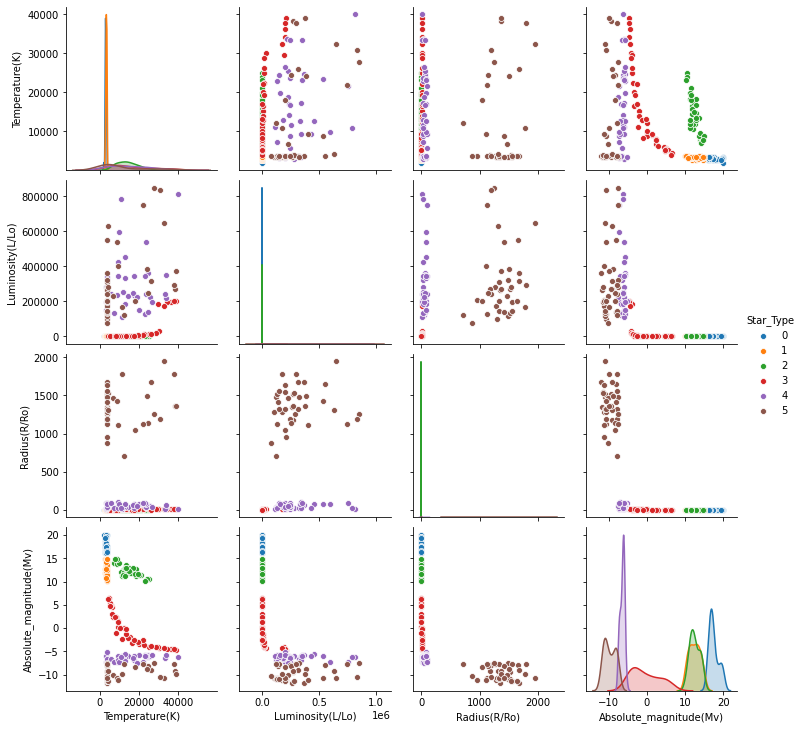

In [0]:
sns.pairplot(estrelas, hue = 'Star_Type')

In [0]:
#Feature Matrix
X_estrelas = estrelas.loc[: ,  ["Temperature(K)",	"Luminosity(L/Lo)", "Radius(R/Ro)",	"Absolute_magnitude(Mv)"] ]
X_estrelas.head()

,Temperature(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv)
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06


In [0]:
#Target
y_estrelas = estrelas.Star_Type
y_estrelas.head()

0    0
1    0
2    0
3    0
4    0
Name: Star_Type, dtype: int64

In [0]:
#Separação do Banco de Dados
from sklearn.model_selection import train_test_split  
Xtreino, Xteste, ytreino, yteste = train_test_split(X_estrelas, y_estrelas, random_state=2020)

**NAIVE BAYES**

In [0]:
from sklearn.naive_bayes import GaussianNB # 1. Escolha do modelo.
model_bayes = GaussianNB()  #2. Escolha  dos hiperparâmetros e intanciação.
model_bayes.fit(Xtreino, ytreino) #4. Ajuste o modelo aos dados.
y_model_bayes = model_bayes.predict(Xteste) #5 Faça predições em dados novos

In [0]:
y_model_bayes

array([3, 3, 0, 2, 5, 1, 1, 4, 4, 4, 2, 2, 1, 1, 1, 1, 4, 1, 5, 5, 3, 0,
       5, 1, 1, 1, 3, 2, 2, 4, 2, 4, 2, 2, 3, 1, 0, 2, 0, 3, 2, 2, 0, 5,
       1, 1, 5, 5, 0, 3, 3, 2, 4, 0, 2, 0, 1, 5, 1, 0])

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(yteste, y_model_bayes)

0.7666666666666667

MATRIZ DE CONFUSÃO -BAYES

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
mat_bayes = confusion_matrix(yteste, y_model_bayes)

Text(83.40000000000006, 0.5, 'Valores Reais')

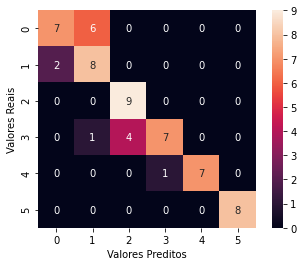

In [0]:
sns.heatmap(mat_bayes, square=True, annot = True)

plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

**DECISION TREE**





In [0]:
from sklearn.tree import DecisionTreeClassifier  # 1. Importação

In [0]:
model_decisiont = DecisionTreeClassifier()       # 2. Hiperparâmetros                                                    
model_decisiont.fit(Xtreino, ytreino)            #4. Ajuste o modelo aos dados.
y_model_decisiont = model_decisiont.predict(Xteste) #5. Faça predições em dados novos

In [0]:
y_model_decisiont

array([3, 3, 0, 3, 5, 0, 0, 4, 4, 4, 2, 2, 1, 1, 1, 1, 4, 1, 5, 5, 3, 0,
       5, 0, 1, 1, 3, 2, 3, 4, 3, 4, 2, 2, 4, 0, 0, 2, 0, 3, 2, 2, 0, 5,
       0, 0, 5, 5, 0, 3, 3, 2, 4, 1, 3, 0, 1, 5, 1, 1])

In [0]:
accuracy_score(yteste, y_model_decisiont)

0.9833333333333333

MATRIZ DE CONFUSÃO - DECISION

In [0]:
mat_decisiont = confusion_matrix(yteste, y_model_decisiont)

Text(83.40000000000006, 0.5, 'Valores Reais')

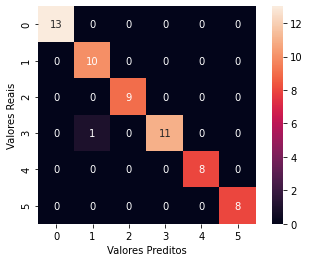

In [0]:
sns.heatmap(mat_decisiont, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

**REDES NEURAIS**

In [0]:
from sklearn.neural_network import MLPClassifier # 1. Importação

In [0]:
model_neural = MLPClassifier()                  #2. Hiperparâmetros
model_neural.fit(Xtreino, ytreino)              #4. Ajuste o modelo aos dados.
y_model_neural = model_neural.predict(Xteste)   #5. Faça predições em dados novos
accuracy_score(yteste, y_model_neural)

0.6833333333333333

MATRIZ DEE CONFUSÃO - NEURAL

Text(83.40000000000006, 0.5, 'Valores Reais')

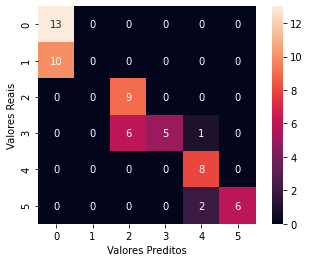

In [0]:
mat_neural = confusion_matrix(yteste, y_model_neural)
sns.heatmap(mat_neural, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')